In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Manipulación de Datos

import numpy as np
import pandas as pd

# Visualización de Datos

import matplotlib.pyplot as plt
import seaborn as sns

# Estadística

from scipy import stats

# Modelos

from sklearn import datasets
from sklearn.datasets import load_iris, make_regression, make_moons

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, log_loss

# Modelos de Machine Learning

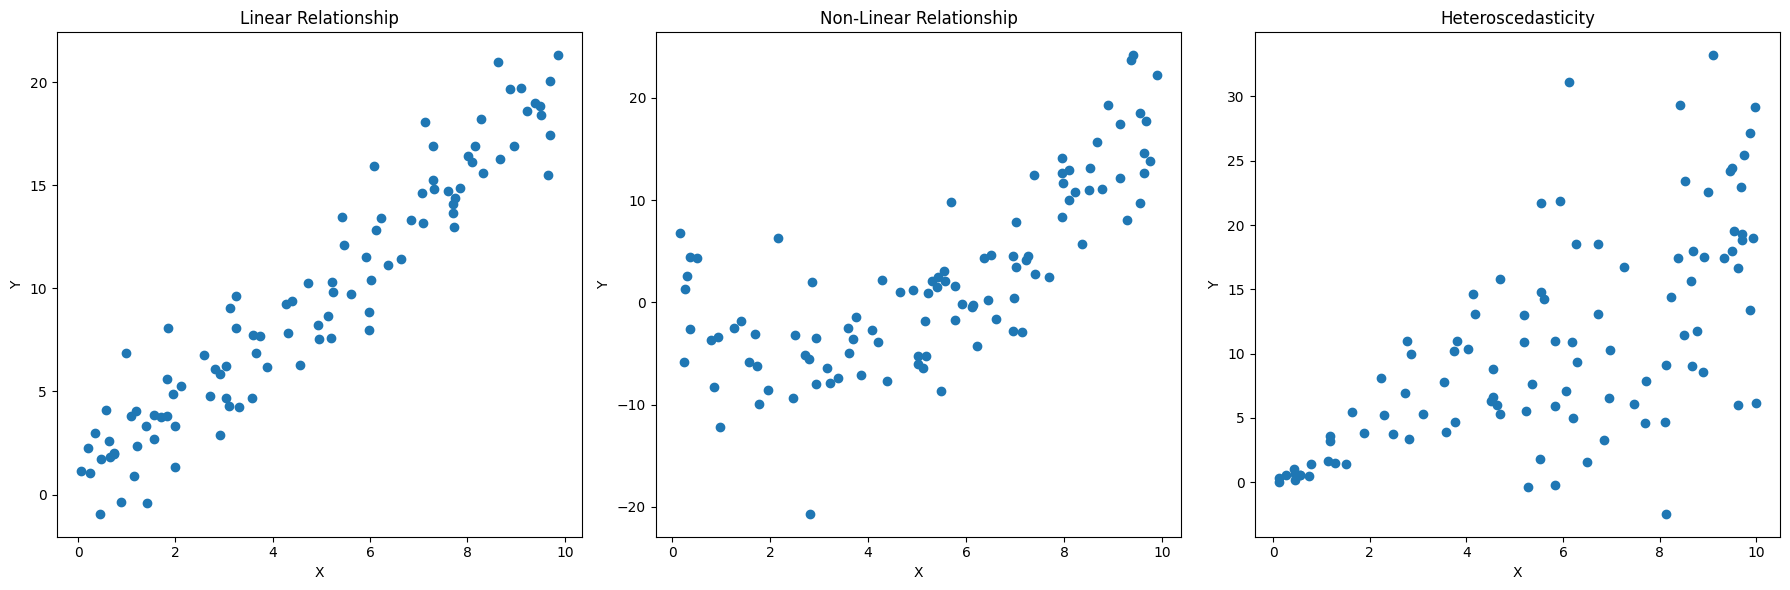

In [3]:
# Generamos 3 sets de datos
np.random.seed(42)

# Ideal para Regresion Lineal
x_linear = np.random.rand(100, 1) * 10  # Random values for independent variable
y_linear = 2 * x_linear + np.random.randn(100, 1) * 2  # Dependent variable with some noise

# No Ideal para Regresion Lineal
x_non_linear = np.random.rand(100, 1) * 10
y_non_linear = 0.5 * x_non_linear**2 - 3 * x_non_linear + np.random.randn(100, 1) * 5

# Lineal pero con heteroscedasticidad
x_heteroscedastic = np.random.rand(100, 1) * 10
y_heteroscedastic = 2 * x_heteroscedastic + np.random.randn(100, 1) * x_heteroscedastic

# Convertimos los set de datos en Dataframes
df_linear = pd.DataFrame({'X': x_linear.flatten(), 'Y': y_linear.flatten()})
df_non_linear = pd.DataFrame({'X': x_non_linear.flatten(), 'Y': y_non_linear.flatten()})
df_heteroscedastic = pd.DataFrame({'X': x_heteroscedastic.flatten(), 'Y': y_heteroscedastic.flatten()})

# Plotting the datasets
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_linear['X'], df_linear['Y'])
plt.title('Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 2)
plt.scatter(df_non_linear['X'], df_non_linear['Y'])
plt.title('Non-Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.scatter(df_heteroscedastic['X'], df_heteroscedastic['Y'])
plt.title('Heteroscedasticity')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

## Modelos de Regresion

Al hablar de regresiones, vamos a tocar 4 de ellas:
- Lineal (la más simple y el punto de partida)
- Polinomica (una extensión de la regresion lineal para intentar ajustar a curvas)
- Ridge / Lasso (una extensión de la regresión lineal para casos multivariables)
- Logistica (empleada principalmente para datasets binarios)

### Regresion Lineal

$$
y = \beta_0 + \beta_1 x
$$

Este modelo busca minimizar la función de coste para ajustar los parámetros $\beta_0$ y $\beta_1$ de manera que se obtenga una representación óptima de la relación entre las variables.

* Función de Coste:

$$
J(\beta) = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_i))^2
$$



Algunos ejemplos de para qué se pueden utilizar las regresiones lineales:

1. **Predicción de ventas**: En empresas, las regresiones lineales pueden utilizarse para predecir las ventas futuras en función de variables como el precio del producto, el gasto en publicidad, el tamaño del mercado, etc.

2. **Análisis de mercado**: Se pueden utilizar para analizar cómo ciertas variables (como la demografía, el ingreso medio, la ubicación geográfica, etc.) afectan a la demanda de un producto o servicio en un mercado determinado.

3. **Evaluación de riesgos financieros**: En el sector financiero, las regresiones lineales se utilizan para evaluar el riesgo crediticio de los prestatarios. Por ejemplo, se pueden utilizar para predecir la probabilidad de incumplimiento de un préstamo en función de variables financieras y personales.

4. **Investigación médica**: En la investigación médica, las regresiones lineales pueden utilizarse para analizar la relación entre variables como la edad, el peso, el hábito de fumar, etc., y el riesgo de desarrollar ciertas enfermedades.

5. **Estimación de precios de bienes raíces**: En el sector inmobiliario, las regresiones lineales pueden utilizarse para predecir el precio de una propiedad en función de variables como el tamaño, la ubicación, el número de habitaciones, etc.

6. **Optimización de procesos industriales**: En la ingeniería y la manufactura, las regresiones lineales pueden utilizarse para identificar las variables que afectan a la eficiencia de un proceso y optimizarlo para maximizar la producción o minimizar los costos.

7. **Análisis de resultados educativos**: En educación, las regresiones lineales pueden utilizarse para analizar cómo factores como el tamaño de la clase, el nivel de financiación, el nivel socioeconómico de los estudiantes, etc., afectan al rendimiento académico.

A la hora de analizar nuestro dataset para si se puede ajustar con una regresion lineal tenemos que tener en cuenta:
- Adecuacion de los datos: los datos deben ser lineales y la varianza de los residuos debe ser constante a lo largo de todo el espacio.
- Analisis de Residuos: deben estar distribuidos aleatoriamente en el espacio y normalmente siguiente una distribucion normal
- Metricas de Ajuste:
  - $R^2$ debe ser lo mas cercano a 1 posible.
  - MSE debe ser lo mas pequeño posible.

Sin embargo, el mejor modelo no siempre es el que tiene las mejores estadísticas, sino el que equilibra el ajuste, la complejidad, la solidez teórica y se generaliza bien a nuevos datos.

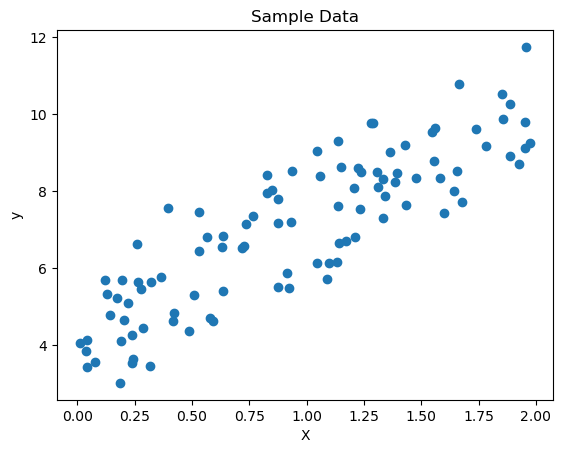

In [5]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data')
plt.show()

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

print("Intercept (theta_0):", lin_reg.intercept_[0])
print("Coefficient (theta_1):", lin_reg.coef_[0][0])
print("Mean Squared Error (Cost):", mean_squared_error(y, y_pred))

Intercept (theta_0): 4.222151077447232
Coefficient (theta_1): 2.968467510701018
Mean Squared Error (Cost): 0.9924386487246482


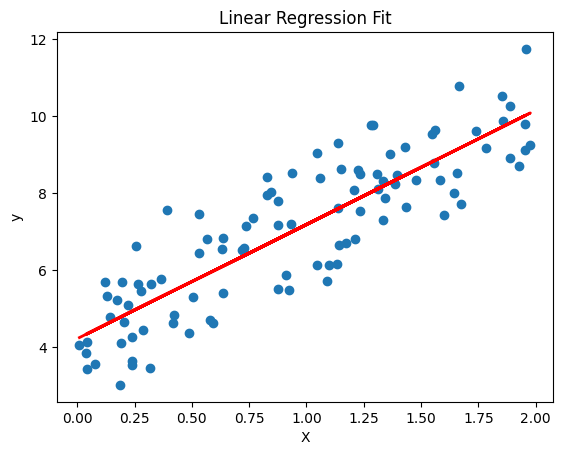

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()

Sin embargo, no todos los datos se ajustan a Regresiones Lineales. Un ejemplo sería...

In [9]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

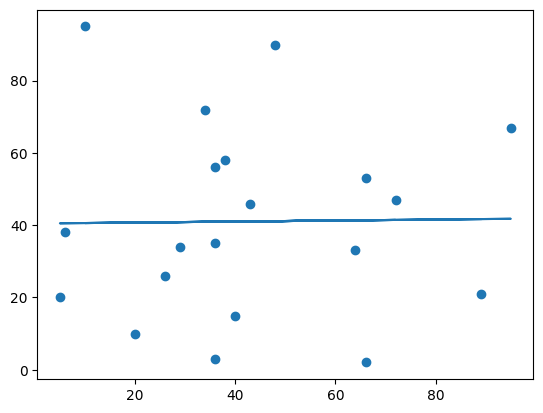

In [8]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Si ahora pasamos a analizar un dataset con un caso real donde se describen algunos datos de clientes y el coste de su seguro.

In [13]:
dataset = pd.read_csv('insurance.csv')

gender = {'female': 1, 'male': 0}
dataset = dataset.replace({"sex": gender})
smoker = {'yes': 1, 'no': 0}
dataset = dataset.replace({"smoker": smoker})
region = {'southwest': 0, 'southeast': 1,'northwest': 2,'northeast': 3}
dataset = dataset.replace({"region": region})

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


Al tener múltiples variables, vamos a analizar las relaciones entre algunas variables.

Un posible candidato sería el bmi, ya que es la variable que puede indicar un alto nivel de salud

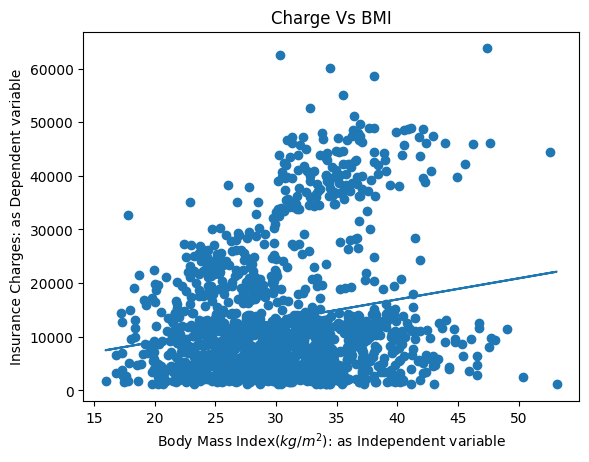

In [10]:
X = dataset.iloc[:,2].values
y = dataset.iloc[:,6].values

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, y)
plt.plot(X, mymodel)
plt.xlabel('Body Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');
plt.show()

otro podría ser la edad

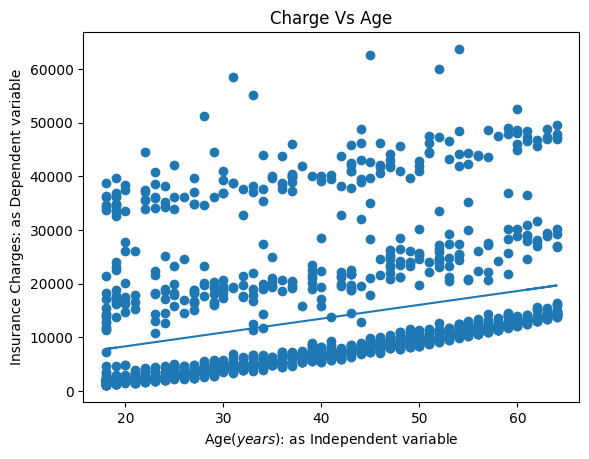

In [11]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,6].values

slope, intercept, r, p, std_err = stats.linregress(X, y)

mymodel = list(map(myfunc, X))

plt.scatter(X, y)
plt.plot(X, mymodel)
plt.xlabel('Age$(years)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs Age');
plt.show()

por lo que podemos concluir que no son las variables mas adecuadas, aunque, en el caso de la erdad, no es en mal ajuste, ya que parece bastante lineal, aunque influenciado por algo externo

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

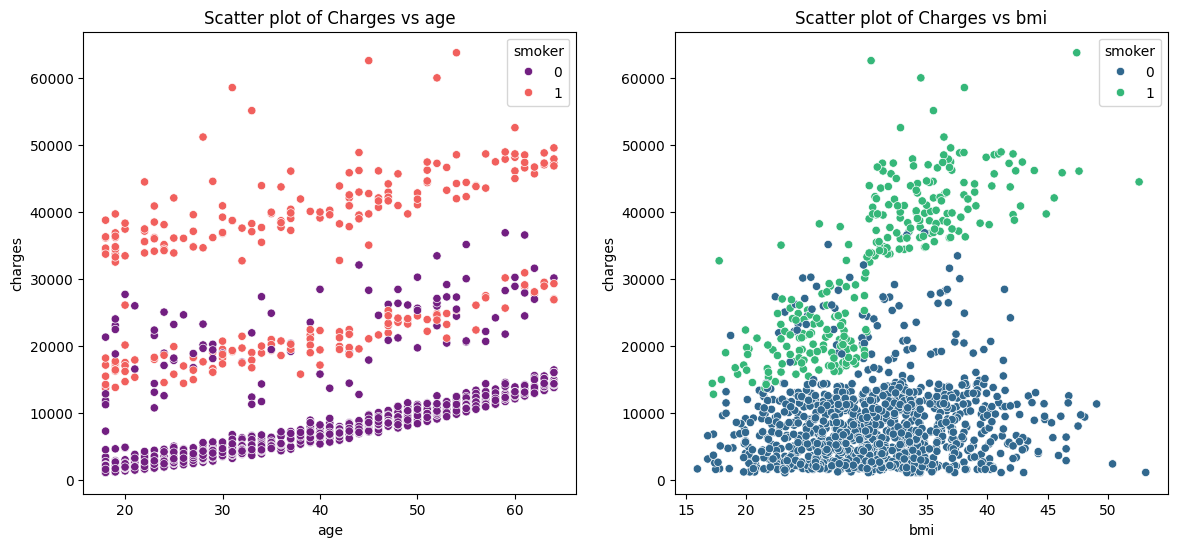

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=dataset,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=dataset,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

Si ahora tomamos todas las variables al mismo tiempo, tendremos:

In [13]:
X = dataset.iloc[:,[0,5]].values
y = dataset.iloc[:,6].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Coefficients: \n", regr.coef_)

y_pred = regr.predict(X_test)

print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))

print("R^2: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [233.3336751  271.81974241]
Mean Squared Error: 138395308.40
R^2: 0.12


donde hemos empleado el coeficiente de correlacion R^2 para entender cuan buna es un ajuste.

### ¿Qué es el coeficiente de correlación?

La correlación es una medida que se emplea para evaluar la relación lineal entre dos conjuntos de variables o datos. Es especialmente útil para comprender como dos variables están relacionadas entre sí y si existe alguna dependencia lineal entre ellas.

En Machine Learning, la correlación se calcula generalmente utilizando el coeficiente de correlación de Pearson.

El coeficiente de correlación de Pearson, \( r \), se calcula con la siguiente fórmula:

$$
r = \frac{\sum_{i=1}^n (x_i - \hat{x})(y_i - \hat{y})}{\sqrt{\sum_{i=1}^n (x_i - \hat{x})^2} \sqrt{\sum_{i=1}^n (y_i - \hat{y})^2}}
$$

donde:
- $x_i$ y $y_i$ son los valores individuales de las dos variables.
- $\hat{x}$ y $\hat{y}$ son las medias (promedios) de las dos variables.
- El denominador es el producto de las desviaciones estándar de ambas variables.
- $r$ varía entre -1 y 1:
  - Si $r = 1$, indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra también aumenta en una relación lineal perfecta.
  - Si $r = -1$, indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra disminuye en una relación lineal perfecta.
  - Si $r = 0$, indica que no hay correlación lineal entre las dos variables.

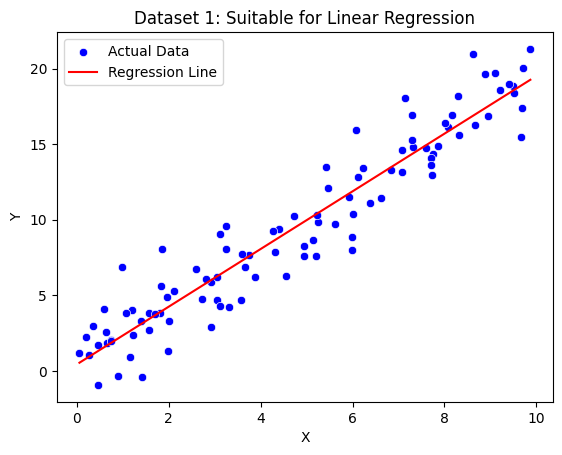

R^2: 0.9081437156468248
MSE: 3.226338255868214


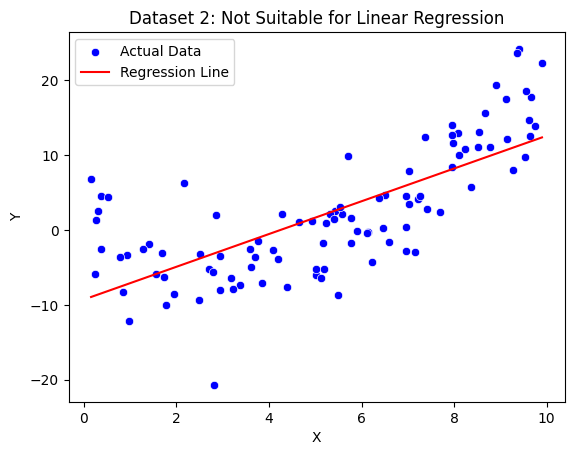

R^2: 0.5301238825598424
MSE: 34.70683763392989


In [14]:
model = LinearRegression()

model.fit(x_linear, y_linear)
predictions_linear = model.predict(x_linear)

r2_linear = r2_score(y_linear, predictions_linear)
mse_linear = mean_squared_error(y_linear, predictions_linear)

sns.scatterplot(x=x_linear.flatten(), y=y_linear.flatten(), color="blue", label="Actual Data")
sns.lineplot(x=x_linear.flatten(), y=predictions_linear.flatten(), color="red", label="Regression Line")
plt.title('Dataset 1: Suitable for Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("R^2:", r2_linear)
print("MSE:", mse_linear)

model.fit(x_non_linear, y_non_linear)
predictions_non_linear = model.predict(x_non_linear)

r2_non_linear = r2_score(y_non_linear, predictions_non_linear)
mse_non_linear = mean_squared_error(y_non_linear, predictions_non_linear)

sns.scatterplot(x=x_non_linear.flatten(), y=y_non_linear.flatten(), color="blue", label="Actual Data")
sns.lineplot(x=x_non_linear.flatten(), y=predictions_non_linear.flatten(), color="red", label="Regression Line")
plt.title('Dataset 2: Not Suitable for Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("R^2:", r2_non_linear)
print("MSE:", mse_non_linear)

Viendo esto podemos intuir que no es suficiente ajustar a una recta, por lo que vamos a adentrarnos en los otros casos:

## Regresión Polinomial

Si los puntos forman una especie de curva, en lugar de una línea recta, usamos la regresión polinomial. Es como dibujar una línea ondulada o curva para pasar por los puntos.

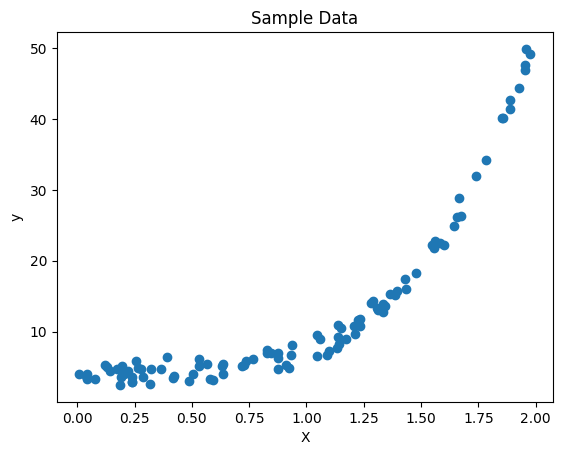

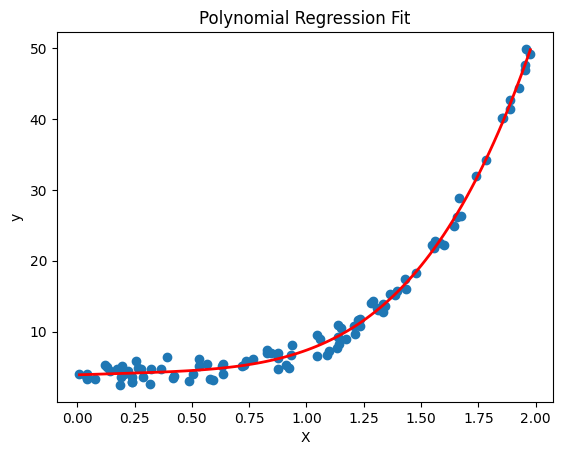

Intercept (theta_0): [3.88354598]
Coefficients (theta_1, theta_2, ...):
 [[ 1.04117685 -0.09146015 -0.73217621  3.26641754]]
Mean Squared Error (Cost): 0.9707499306375591


In [15]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X**4 + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data')
plt.show()

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = lin_reg.predict(X_range_poly)

plt.scatter(X, y)
plt.plot(X_range, y_range_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.show()

print("Intercept (theta_0):", lin_reg.intercept_)
print("Coefficients (theta_1, theta_2, ...):\n", lin_reg.coef_)

print("Mean Squared Error (Cost):", metrics.mean_squared_error(y, y_pred))

## Regresión Lasso/Ridge

A veces, hay muchísimos puntos y es complicado saber cuáles son importantes. La regresión Lasso y Ridge son como herramientas especiales que nos ayudan a dibujar la línea, asegurándonos de que no prestamos demasiada atención a los puntos que no son tan importantes.

La regresión Lasso es aún más especial porque puede ignorar completamente algunos puntos que no ayudan mucho.

### ¿Que ocurre si el modelo se ajusta demasiado bien a los datos de entrenamiento tanto que captura el ruido o fluctuaciones aleatorias presentes en ellos?

Este sobreajuste se combate añadiendo un término de penalización a la función de coste original lo que impone una penalización a los coeficientes.

#### L1 (Lasso)

* Función de Coste:

$$
J_{L1}(\beta) = J(\beta) + \lambda \sum_{i=1}^{n} |\beta_i|
$$

#### L2 (Ridge)

* Función de Coste:

$$
J_{L2}(\beta) = J(\beta) + \lambda \sum_{i=1}^{n} \beta_i^2
$$

Ridge Regression
Intercept: -0.8971656583915715
Coefficients: [44.10884366]
Mean Squared Error: 697.8387730154825

Lasso Regression
Intercept: -0.8933440250250084
Coefficients: [43.74569525]
Mean Squared Error: 693.9611825161214


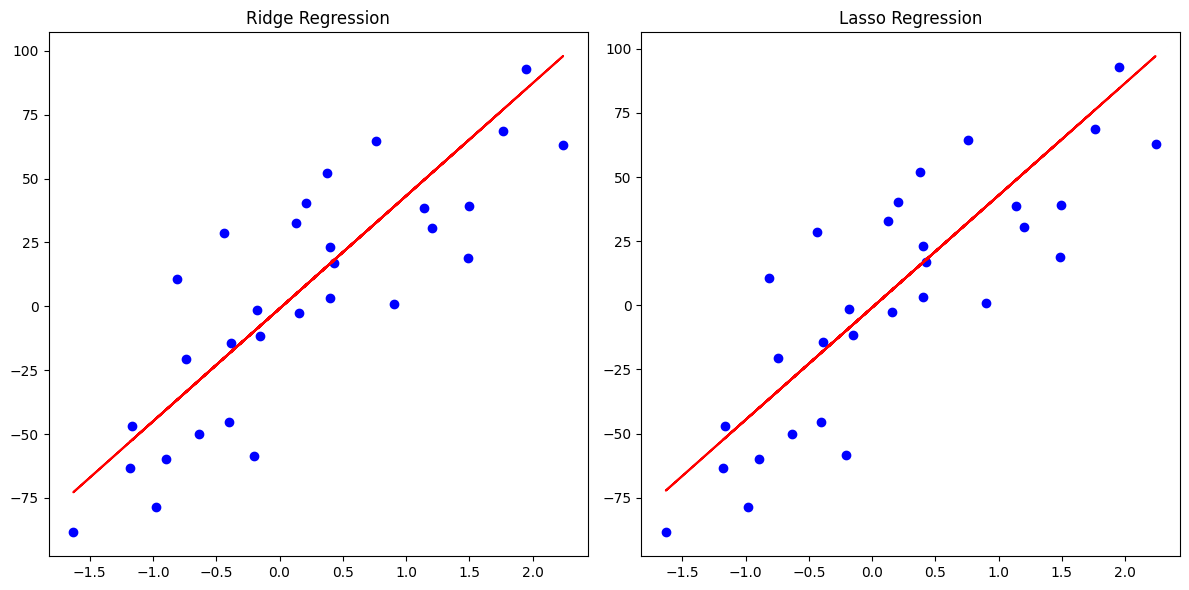

In [16]:
X, y = make_regression(n_samples=100, n_features=1, noise=25, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression")
print("Intercept:", ridge.intercept_)
print("Coefficients:", ridge.coef_)
print("Mean Squared Error:", mse_ridge)
print("\nLasso Regression")
print("Intercept:", lasso.intercept_)
print("Coefficients:", lasso.coef_)
print("Mean Squared Error:", mse_lasso)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_ridge, color='red')
plt.title('Ridge Regression')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_lasso, color='red')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

## Regresión Logística

Esta la usamos cuando los puntos representan cosas como 'sí' o 'no', 'verdadero' o 'falso'. En lugar de encontrar la mejor línea o curva, nos ayuda a decidir si un punto es más un 'sí' o un 'no'.

### Regresion Logistica

$$
𝑝(𝑥) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$

* Función de Coste:

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} (y_i \log(p(x_i)) + (1 - y_i) \log(1 - p(x_i)))
$$

Algunas aplicaciones comunes de la regresión logística:

1. **Modelado de riesgos de crédito**: En la industria financiera, la regresión logística se utiliza para predecir la probabilidad de incumplimiento de un préstamo en función de variables como el historial crediticio del prestatario, los ingresos, la deuda existente, etc.

2. **Predicción de la probabilidad de enfermedades**: En medicina, la regresión logística se utiliza para predecir la probabilidad de que un paciente desarrolle cierta enfermedad en función de factores como la edad, el género, el historial médico, los hábitos de vida, etc.

3. **Modelado de respuesta a marketing**: En el ámbito del marketing, la regresión logística se utiliza para predecir la probabilidad de que un cliente realice una determinada acción, como hacer una compra, hacer clic en un anuncio, suscribirse a un servicio, etc., en función de variables demográficas, comportamentales o de compra anteriores.

4. **Análisis de riesgos en seguros**: Las compañías de seguros utilizan la regresión logística para evaluar el riesgo de reclamaciones en función de variables como la edad del asegurado, el tipo de póliza, el historial de reclamaciones previas, etc.

5. **Predicción de la respuesta a tratamientos médicos**: En ensayos clínicos, la regresión logística se utiliza para predecir la probabilidad de que un paciente responda favorablemente a un determinado tratamiento en función de características individuales y biomédicas.

6. **Detección de fraude**: En la industria financiera y de seguros, la regresión logística se utiliza para identificar transacciones o reclamaciones fraudulentas en función de patrones sospechosos de comportamiento y otras variables relacionadas.

7. **Análisis de riesgos de seguridad**: En seguridad informática, la regresión logística se puede utilizar para predecir la probabilidad de que un evento sea un ataque cibernético en función de variables como el comportamiento del tráfico de red, las características del sistema, etc.

Veamos, por ejemplo, con el dataset de las flores del iris

In [17]:
data = load_iris()
X = data.data[:100]
y = data.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Log Loss:", loss)
print("\nIntercept (theta_0):", log_reg.intercept_[0])
print("Coefficients (theta_1, ..., theta_n):\n", log_reg.coef_)

Accuracy: 1.0
Log Loss: 0.02582629945627835

Intercept (theta_0): -5.913167821522069
Coefficients (theta_1, ..., theta_n):
 [[ 0.35679509 -0.8308647   2.14490549  0.90923807]]


**Ejemplos:**

Tenemos:
* example_linear_dataset.csv
  - Todos los modelos de regresión (lineal y Ridge) muestran un ajuste similarmente bueno.
  - La regresión polinomial también funciona bien, pero su complejidad adicional no aporta mejoras significativas.
* example_polynomial_dataset.csv
  - La regresión polinomial es claramente superior, como se esperaba debido a la naturaleza no lineal de los datos.
* example_logistic_dataset.csv
  - Solo la regresión logística es aplicable y proporciona resultados perfectos.
* example_high_dim_dataset.csv
  - Sorprendentemente, la regresión polinomial muestra un R-cuadrado de 1.0, lo que sugiere un ajuste perfecto y podría indicar un sobreajuste.
  - Tanto la regresión lineal como la Ridge muestran un ajuste moderado.

In [18]:
def evaluate_models(X, y, is_classification=False):
    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X, y)
    predictions_linear = model_linear.predict(X)
    r2_linear = r2_score(y, predictions_linear) if not is_classification else None

    # Polynomial Regression (degree 3)
    poly_features = PolynomialFeatures(degree=3)
    X_poly = poly_features.fit_transform(X)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    predictions_poly = model_poly.predict(X_poly)
    r2_poly = r2_score(y, predictions_poly) if not is_classification else None

    # Logistic Regression
    if is_classification:
        model_logistic = LogisticRegression()
        model_logistic.fit(X, y)
        predictions_logistic = model_logistic.predict(X)
        accuracy_logistic = accuracy_score(y, predictions_logistic)
    else:
        accuracy_logistic = None

    # Ridge Regression
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X, y)
    predictions_ridge = model_ridge.predict(X)
    r2_ridge = r2_score(y, predictions_ridge) if not is_classification else None

    return {
        'Linear Regression R2': r2_linear,
        'Polynomial Regression R2': r2_poly,
        'Logistic Regression Accuracy': accuracy_logistic,
        'Ridge Regression R2': r2_ridge
    }

df_linear = pd.read_csv('example_linear_dataset.csv')
print(evaluate_models(df_linear[['X']], df_linear['Y']))

df_polynomial = pd.read_csv('example_polynomial_dataset.csv')
print(evaluate_models(df_polynomial[['X']], df_polynomial['Y']))

df_logistic = pd.read_csv('example_logistic_dataset.csv')
print(evaluate_models(df_logistic[['X']], df_logistic['Y']))

df_high_dim = pd.read_csv('example_high_dim_dataset.csv')
print(evaluate_models(df_high_dim.drop('Y', axis=1), df_high_dim['Y']))

{'Linear Regression R2': 0.9510211369876471, 'Polynomial Regression R2': 0.9520064281936985, 'Logistic Regression Accuracy': None, 'Ridge Regression R2': 0.9510197121826324}
{'Linear Regression R2': 0.651716807879156, 'Polynomial Regression R2': 0.7832987534901521, 'Logistic Regression Accuracy': None, 'Ridge Regression R2': 0.6517157114270123}
{'Linear Regression R2': 0.7077071326971909, 'Polynomial Regression R2': 0.8220027873915623, 'Logistic Regression Accuracy': None, 'Ridge Regression R2': 0.7077059762176647}
{'Linear Regression R2': 0.4148884456700781, 'Polynomial Regression R2': 1.0, 'Logistic Regression Accuracy': None, 'Ridge Regression R2': 0.40670519205992617}


**Ejercicio:**

Al igual que para el caso anterior, diseñad un algoritmo que permita validar cual es el mejor modelo para los datasets testing_regression_exercise_2_*

In [15]:
def load_data(path):
    return pd.read_csv(path)

def evaluate_models(X, y, is_classification=False):
    results = {}
    
    # Regresión lineal
    if not is_classification:
        model_linear = LinearRegression()
        model_linear.fit(X, y)
        predictions_linear = model_linear.predict(X)
        results['Linear Regression R2'] = r2_score(y, predictions_linear)
    
    # Regresión polinomica
    if not is_classification:
        poly_features = PolynomialFeatures(degree=3)
        X_poly = poly_features.fit_transform(X)
        model_poly = LinearRegression()
        model_poly.fit(X_poly, y)
        predictions_poly = model_poly.predict(X_poly)
        results['Polynomial Regression R2'] = r2_score(y, predictions_poly)
    
    # Regresión logística
    if is_classification:
        model_logistic = LogisticRegression()
        model_logistic.fit(X, y)
        predictions_logistic = model_logistic.predict(X)
        results['Logistic Regression Accuracy'] = accuracy_score(y, predictions_logistic)
    
    # Regresión Ridge
    if not is_classification:
        model_ridge = Ridge()
        model_ridge.fit(X, y)
        predictions_ridge = model_ridge.predict(X)
        results['Ridge Regression R2'] = r2_score(y, predictions_ridge)
    
    return results

linear_test_dataset_path = 'testing_regression_exercise_2_dataset_1.csv'
poly_test_dataset_path = 'testing_regression_exercise_2_dataset_2.csv'
logistic_test_dataset_path = 'testing_regression_exercise_2_dataset_3.csv'
high_dim_test_dataset_path = 'testing_regression_exercise_2_dataset_4.csv'

df_linear = load_data(linear_test_dataset_path)
results_linear = evaluate_models(df_linear[['X']], df_linear['Y'])
print("Resultados para el conjunto de datos lineal:", results_linear)
print(" ")

df_poly = load_data(poly_test_dataset_path)
results_poly = evaluate_models(df_poly[['X']], df_poly['Y'])
print("Resultados para el conjunto de datos polinomial:", results_poly)
print(" ")

df_logistic = load_data(logistic_test_dataset_path)
results_logistic = evaluate_models(df_logistic[['X']], df_logistic['Y'], is_classification=True)
print("Resultados para el conjunto de datos logístico:", results_logistic)
print(" ")

df_high_dim = load_data(high_dim_test_dataset_path)
results_high_dim = evaluate_models(df_high_dim.drop('Y', axis=1), df_high_dim['Y'])
print("Resultados para el conjunto de datos de alta dimensionalidad:", results_high_dim)
print(" ")

Resultados para el conjunto de datos lineal: {'Linear Regression R2': 0.9057399618878075, 'Polynomial Regression R2': 0.90734055025226, 'Ridge Regression R2': 0.9057383174865252}
 
Resultados para el conjunto de datos polinomial: {'Linear Regression R2': 0.6620226944063947, 'Polynomial Regression R2': 0.8924642154583748, 'Ridge Regression R2': 0.66202140713081}
 
Resultados para el conjunto de datos logístico: {'Logistic Regression Accuracy': 1.0}
 
Resultados para el conjunto de datos de alta dimensionalidad: {'Linear Regression R2': 0.2719368388657295, 'Polynomial Regression R2': 1.0, 'Ridge Regression R2': 0.2680174325487549}
 


Resultados para el conjunto de datos lineal:
- Resultados: La regresión lineal y Ridge tuvieron un R^2 cercano a 0.923, mientras que la regresión polinomial tuvo un R^2 ligeramente superior.
Solución: Aunque la regresión polinomial mostró un R^2 ligeramente mejor,la simplicidad de la regresión lineal la hace más apropiada.
Además, la regresión Ridge mostró resultados similares, lo que indica que la regularización no tiene un efecto significativo en un conjunto de datos ya adecuado para la regresión lineal.

Resultados para el conjunto de datos polinomial:
- Resultados: La regresión polinomial tuvo un R^2 de 0.918, significativamente mejor que la lineal (R^2 = 0.690) y la de Ridge.
Solución: Este conjunto de datos se ajusta claramente mejor con la regresión polinomial, lo que indica una relación no lineal entre las variables.

Resultados para el conjunto de datos logístico:
- Resultados: La regresión logística tuvo una precisión perfecta del 100%, mientras que las otras regresiones no eran aplicables.
Solución: Dado que es un problema de clasificación binaria, la regresión logística es la más adecuada y proporciona resultados excelentes.

Resultados para el conjunto de datos de alta dimensionalidad:
- Resultados: La regresión polinomial tuvo un R^2 perfecto de 1.0, lo que podría indicar un sobreajuste. La regresión lineal y Ridge tuvieron un ajuste moderado.
Solución: Aunque la regresión polinomial mostró un ajuste perfecto, es probable que sea un caso de sobreajuste debido a la complejidad del modelo.
En este caso, un modelo regularizado como Ridge podría ser más apropiado, aunque el ajuste no es ideal.

## Modelos basados en Árboles

### Árboles de Decision

Son representaciones graficas de las posibles soluciones de una decision basadas en determinadas condiciones.

Se construyen identificando las posibles soluciones o resultados y organizandolos en una estructura en forma de arbol basandose en las condiciones que llevan a los determinados resultados.

## ¿Cuándo debemos emplearlos respecto de los modelos de regresión?

Veamos...

- Los árboles de decisión se emplean cuando queremos ordenar datasets. Tomemos como ejemplo, un caso donde tengamos diferentes tipos de juguetes - coches, muñecas, bloques - y cada tipo va en su propia caja. Los árboles de decisión hacen algo parecido. Ellos ordenan la información en diferentes cajas basándose en cómo es.
- Los modelos de regresión se emplean cuando queremos adivinar un dato. Tomameos como ejemplo, adivinar cuántos caramelos hay en un tarro. Aquí tendremos que mirar cúan grande es el tarro, cúan grandes son los caramelos, ... y hacer una suposición.

En definitiva, los árboles de decisión son para clasificar cosas en grupos, y la regresión es para adivinar números.